<a href="https://colab.research.google.com/github/JingleiZhu-Jane/A14-Assignment/blob/main/Assignment7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA_Kidney_Clear_Cell_Carcinoma_(KIRC)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.KIRC.sampleMap_HiSeqV2_PANCAN.gz  TCGA.KIRC.sampleMap_KIRC_clinicalMatrix


In [27]:
!pip install sparse_lmm

In [17]:
# Read file

import pandas as pd
import numpy as np
clinical_data = pd.read_csv('TCGA.KIRC.sampleMap_KIRC_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.KIRC.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)


In [18]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_KIRC,_PANCAN_mutation_PANCAN,_PATIENT,...,_GENOMIC_ID_TCGA_KIRC_mutation,_GENOMIC_ID_TCGA_KIRC_PDMarrayCNV,_GENOMIC_ID_TCGA_KIRC_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_KIRC_PDMRNAseq,_GENOMIC_ID_TCGA_KIRC_miRNA_GA,_GENOMIC_ID_TCGA_KIRC_mutation_bcm_gene,_GENOMIC_ID_TCGA_KIRC_G4502A_07_3,_GENOMIC_ID_data/public/TCGA/KIRC/miRNA_GA_gene,_GENOMIC_ID_TCGA_KIRC_RPPA_RBN,_GENOMIC_ID_TCGA_KIRC_PDMRNAseqCNV
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,TCGA-3Z-A93Z-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-3Z-A93Z,...,NaN,NaN,c6075673-2b4f-45f2-b1e4-1d3356fce6aa,TCGA-3Z-A93Z-01,NaN,TCGA-3Z-A93Z-01A-11D-A36X-10,NaN,NaN,NaN,TCGA-3Z-A93Z-01
TCGA-6D-AA2E-01,TCGA-6D-AA2E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-6D-AA2E,...,NaN,NaN,31b392f4-0d9c-49f4-a82a-71589813f0ed,TCGA-6D-AA2E-01,NaN,TCGA-6D-AA2E-01A-11D-A36X-10,NaN,NaN,NaN,TCGA-6D-AA2E-01
TCGA-A3-3306-01,TCGA-A3-3306-01,Kirc+,C5-KIRC,KIRC-like c17,KIRC-like c1,KIRC-like c9,NaN,NaN,NaN,TCGA-A3-3306,...,NaN,TCGA-A3-3306-01,cc6591d4-7d72-4556-a23b-ba82afba82e0,TCGA-A3-3306-01,NaN,NaN,TCGA-A3-3306-01A-01R-0864-07,NaN,TCGA-A3-3306-01A-02-1737-20,TCGA-A3-3306-01
TCGA-A3-3306-11,TCGA-A3-3306-11,NaN,C5-KIRC,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A3-3306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A3-3307-01,TCGA-A3-3307-01,Kirc+,NaN,NaN,NaN,KIRC-like c9,miRNA cluster 14,cluster 3,NaN,TCGA-A3-3307,...,NaN,TCGA-A3-3307-01,29eeeae4-a3c5-4008-a129-045485442021,TCGA-A3-3307-01,TCGA-A3-3307-01,NaN,TCGA-A3-3307-01A-01R-0864-07,TCGA-A3-3307-01,NaN,TCGA-A3-3307-01


In [19]:
# Display gene dataset
gene_data.head()

,TCGA-BP-4162-01,TCGA-CJ-5677-11,TCGA-DV-5566-01,TCGA-BP-5191-01,TCGA-BP-5200-01,TCGA-BP-4347-01,TCGA-BP-4770-01,TCGA-B0-5696-11,TCGA-BP-4762-01,TCGA-BP-4158-01,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.639008,1.032908,0.897208,0.342308,0.197608,0.155308,-1.427592,1.278708,0.051008,0.898108,...,0.694608,-0.308392,0.401208,-0.365892,0.411108,0.088508,0.263308,1.017708,0.330908,0.465408
HIF3A,-0.026426,0.939574,0.229474,-0.548426,-0.222126,2.055474,0.487474,0.424174,-1.774526,1.649174,...,0.651374,-0.729426,-0.386726,3.064774,0.653274,0.756874,1.189874,2.274574,0.624074,0.674574
RNF17,3.272565,-0.531035,-0.531035,-0.531035,-0.531035,-0.192435,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.081765,-0.531035
RNF10,-0.339672,0.435428,-0.229772,0.566328,-0.262672,-0.371072,0.418728,0.617028,-0.404172,-0.452472,...,-0.043772,-0.006672,-0.280772,0.178528,-0.025772,-0.207772,0.378928,-0.472772,-0.260772,-0.428672
RNF11,0.450122,0.856922,0.351122,-0.626578,0.324422,0.029222,0.925722,0.753822,1.265022,0.331422,...,0.795022,-0.730578,0.495822,0.471222,0.431322,0.525822,0.433622,-0.083678,0.655122,0.579022


In [20]:
# Set Basic info

trait = 'Kidney_Clear_Cell_Carcinoma'
condition = 'depression'
condition_col = 'TPH2'

gene_list = gene_data.index.tolist()
# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_list)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')


The clinical dataset has 111 features, and the gene dataset includes 20530 genes


In [21]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,_PANCAN_UNC_RNAseq_PANCAN_K16,_PANCAN_miRNA_PANCAN,_PANCAN_mirna_KIRC,_PANCAN_mutation_PANCAN,_PATIENT,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,TCGA-3Z-A93Z-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-3Z-A93Z,...,-0.748878,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788
TCGA-6D-AA2E-01,TCGA-6D-AA2E-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-6D-AA2E,...,0.640122,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012
TCGA-A3-3306-01,TCGA-A3-3306-01,Kirc+,C5-KIRC,KIRC-like c17,KIRC-like c1,KIRC-like c9,NaN,NaN,NaN,TCGA-A3-3306,...,-0.748878,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488
TCGA-A3-3306-11,TCGA-A3-3306-11,NaN,C5-KIRC,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-A3-3306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-A3-3307-01,TCGA-A3-3307-01,Kirc+,NaN,NaN,NaN,KIRC-like c9,miRNA cluster 14,cluster 3,NaN,TCGA-A3-3307,...,-0.748878,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588


In [22]:
# Only select relevant columns

#input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
feature_cols = [condition_col] + gene_list
merged_data = merged_data[feature_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,-0.281574,0.387008,0.812474,-0.531035,-0.178772,0.158822,0.11509,-0.459694,1.917454,-0.423399,...,-0.748878,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788
TCGA-6D-AA2E-01,-0.281574,1.106808,0.963574,0.091565,0.116128,0.043422,0.69089,0.350606,0.302054,0.199201,...,0.640122,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012
TCGA-A3-3306-01,0.743626,0.265308,-0.725226,-0.531035,-1.129672,0.940722,1.09239,-0.443194,-2.053746,0.601801,...,-0.748878,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488
TCGA-A3-3307-01,-0.281574,-0.051592,2.182574,-0.531035,-0.176072,0.712722,0.90509,-0.030994,-0.291846,0.121301,...,-0.748878,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588
TCGA-A3-3308-01,-0.281574,0.610008,0.688974,-0.531035,-0.108072,0.644222,0.01179,-0.407094,1.853354,0.515801,...,-0.204078,3.734683,1.145067,3.40641,0.512023,1.354714,3.016773,-0.411995,3.419367,-0.618712


In [23]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()


,TPH2,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Kidney_Clear_Cell_Carcinoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,-0.281574,0.387008,0.812474,-0.531035,-0.178772,0.158822,0.11509,-0.459694,1.917454,-0.423399,...,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788,1
TCGA-6D-AA2E-01,-0.281574,1.106808,0.963574,0.091565,0.116128,0.043422,0.69089,0.350606,0.302054,0.199201,...,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012,1
TCGA-A3-3306-01,0.743626,0.265308,-0.725226,-0.531035,-1.129672,0.940722,1.09239,-0.443194,-2.053746,0.601801,...,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488,1
TCGA-A3-3307-01,-0.281574,-0.051592,2.182574,-0.531035,-0.176072,0.712722,0.90509,-0.030994,-0.291846,0.121301,...,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588,1
TCGA-A3-3308-01,-0.281574,0.610008,0.688974,-0.531035,-0.108072,0.644222,0.01179,-0.407094,1.853354,0.515801,...,3.734683,1.145067,3.40641,0.512023,1.354714,3.016773,-0.411995,3.419367,-0.618712,1


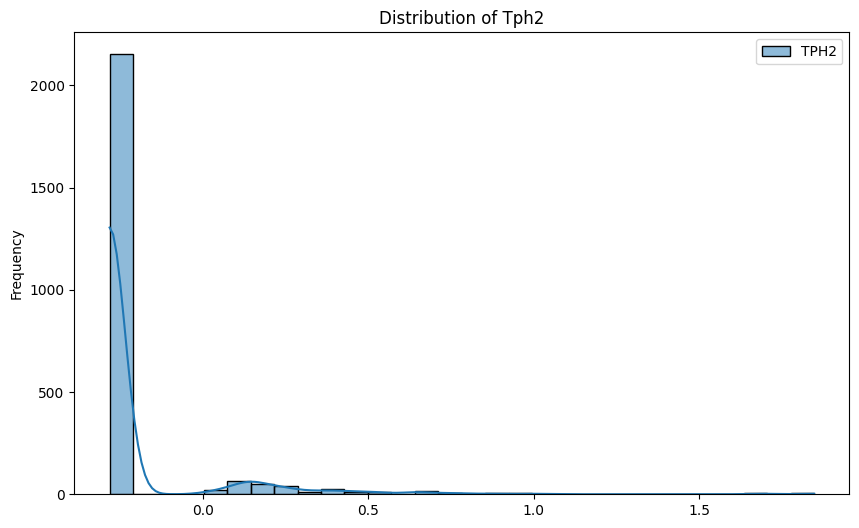

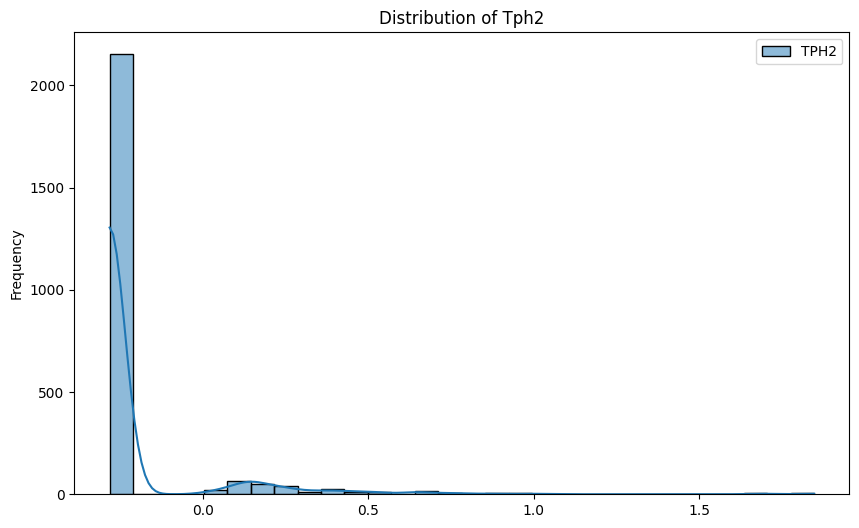

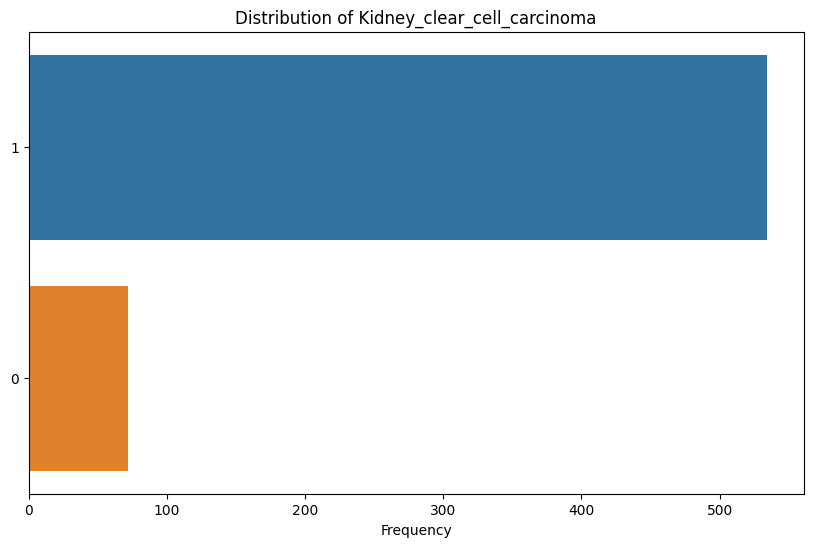

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()


def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# For example, we may want to choose a few genes we are interested in for visualization:
interested_genes = [col for col in gene_list if 'tph2' in col.lower()]
analyze_distributions(merged_data, numerical_columns=[condition_col, *interested_genes], categorical_columns=[trait])


In [25]:
merged_data = merged_data.rename(columns={condition_col: condition})
feature_cols = merged_data.columns.tolist()[:-1]

merged_data.head()

,depression,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Kidney_Clear_Cell_Carcinoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3Z-A93Z-01,-0.281574,0.387008,0.812474,-0.531035,-0.178772,0.158822,0.11509,-0.459694,1.917454,-0.423399,...,3.152683,1.547367,2.66611,0.432523,1.416814,3.508973,0.525105,-0.036533,0.358788,1
TCGA-6D-AA2E-01,-0.281574,1.106808,0.963574,0.091565,0.116128,0.043422,0.69089,0.350606,0.302054,0.199201,...,5.143983,-0.417133,2.95201,0.141123,0.076514,0.593473,1.018105,2.142467,-0.016012,1
TCGA-A3-3306-01,0.743626,0.265308,-0.725226,-0.531035,-1.129672,0.940722,1.09239,-0.443194,-2.053746,0.601801,...,-1.587117,-0.257533,-1.28139,1.336223,0.308514,1.636373,0.688305,-0.287133,0.266488,1
TCGA-A3-3307-01,-0.281574,-0.051592,2.182574,-0.531035,-0.176072,0.712722,0.90509,-0.030994,-0.291846,0.121301,...,1.942783,1.144967,2.35871,0.555323,0.984914,2.844173,0.350805,1.712867,0.153588,1
TCGA-A3-3308-01,-0.281574,0.610008,0.688974,-0.531035,-0.108072,0.644222,0.01179,-0.407094,1.853354,0.515801,...,3.734683,1.145067,3.40641,0.512023,1.354714,3.016773,-0.411995,3.419367,-0.618712,1


In [28]:
import pandas as pd
from sparse_lmm import VariableSelection

def preprocess_data(X_train, X_test=None):
    # Normalize training data
    mean_train = np.mean(X_train, axis=0)
    std_train = np.std(X_train, axis=0)

    X_train_normalized = (X_train - mean_train) / std_train

    # Set columns with zero std to zero for training data
    zero_std_columns_train = np.where(std_train == 0)[0]
    X_train_normalized[:, zero_std_columns_train] = 0

    if X_test is not None:
        # Normalize test data using training data's mean and std
        X_test_normalized = (X_test - mean_train) / std_train
        X_test_normalized[:, zero_std_columns_train] = 0
    else:
        X_test_normalized = None

    return X_train_normalized, X_test_normalized

In [29]:
def cross_validation(X, y, k=5):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]

        # Preprocess the train and test data
        X_train, X_test = preprocess_data(X_train, X_test)

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies), np.std(accuracies)

# Select relevant columns and convert to numpy array
y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

cv_mean, cv_std = cross_validation(X, y)
print(f'The cross-validation accuracy is {(cv_mean * 100):.2f}% ± {(cv_std * 100):.2f}%')

<ipython-input-28-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
<ipython-input-28-abef56c5c9ec>:17: RuntimeWarning: invalid value encountered in divide
  X_test_normalized = (X_test - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)


The cross-validation accuracy is 77.35% ± 3.08%


In [30]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

y = merged_data[trait].values
X = merged_data.drop(columns=[trait]).values

X, _ = preprocess_data(X)
# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
p_values = [np.exp(-p) for p in nlog_p_values]

<ipython-input-28-abef56c5c9ec>:9: RuntimeWarning: invalid value encountered in divide
  X_train_normalized = (X_train - mean_train) / std_train
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


In [31]:
import pandas as pd
from statsmodels.stats.multitest import multipletests


# Create a DataFrame for the regression results
regression_df = pd.DataFrame({
    'Variable': feature_cols,
    'Coefficient': coefficients,
    'p_value': p_values
})

# Extract information about the lifestyle condition's effect
condition_effect = regression_df.iloc[0]

# Report the effect of the lifestyle condition
print(f"Effect of the condition on the target variable:")
print(f"Variable: {condition}")
print(f"Coefficient: {condition_effect['Coefficient']:.4f}")
print(f"p-value: {condition_effect['p_value']:.4g}\n")

Effect of the condition on the target variable:
Variable: depression
Coefficient: -0.0006
p-value: 0.8796



In [32]:
threshold = 0.05
# Apply the Benjamini-Hochberg correction
rejected, corrected_p_values, _, _ = multipletests(regression_df['p_value'][1:], alpha=threshold, method='fdr_bh')

# Add the corrected p-values to the DataFrame (ignoring the first row which is the condition)
regression_df.loc[1:, 'corrected_p_value'] = corrected_p_values

# Now filter based on the corrected p-values
significant_genes = regression_df.loc[(regression_df.index > 0) & (regression_df['corrected_p_value'] < threshold)]
significant_genes_sorted = significant_genes.sort_values('corrected_p_value')

# Print and/or save your results as before
print(f"Genes with corrected p-value < {threshold}, affecting the trait {trait} conditional on the factor {condition}, sorted by corrected p-value:")
print(significant_genes_sorted[['Variable', 'Coefficient', 'corrected_p_value']].to_string(index=False))
print(f"\nFound {len(significant_genes_sorted)} significant genes with corrected p-value < {threshold}")
# Save this to a CSV file
significant_genes_sorted.to_csv('significant_genes_report_corrected.csv', index=False)


Genes with corrected p-value < 0.05, affecting the trait Kidney_Clear_Cell_Carcinoma conditional on the factor depression, sorted by corrected p-value:
   Variable  Coefficient  corrected_p_value
SNORD116-19     0.440594       0.000000e+00
     TTTY22    -0.440594       0.000000e+00
     TTTY12     0.440594       0.000000e+00
    SNORA69    -0.440594       0.000000e+00
   C11orf40    -0.440594       0.000000e+00
   ?|728045     0.440594       0.000000e+00
     TTTY21     0.440594       0.000000e+00
   SNORA36C    -0.440594       0.000000e+00
   KRTAP6-1     0.440594       0.000000e+00
     P2RX6P    -0.440594       0.000000e+00
     SNAR-H    -0.440594       0.000000e+00
    DEFB110    -0.440594       0.000000e+00
   SNORA11C    -0.440594       0.000000e+00
   SNORD88C    -0.440594       0.000000e+00
  KRTAP20-1     0.440594       0.000000e+00
     TTTY18    -0.440594       0.000000e+00
        NMS     0.440594       0.000000e+00
    SPINK14    -0.440594       0.000000e+00
     SNAR-D 